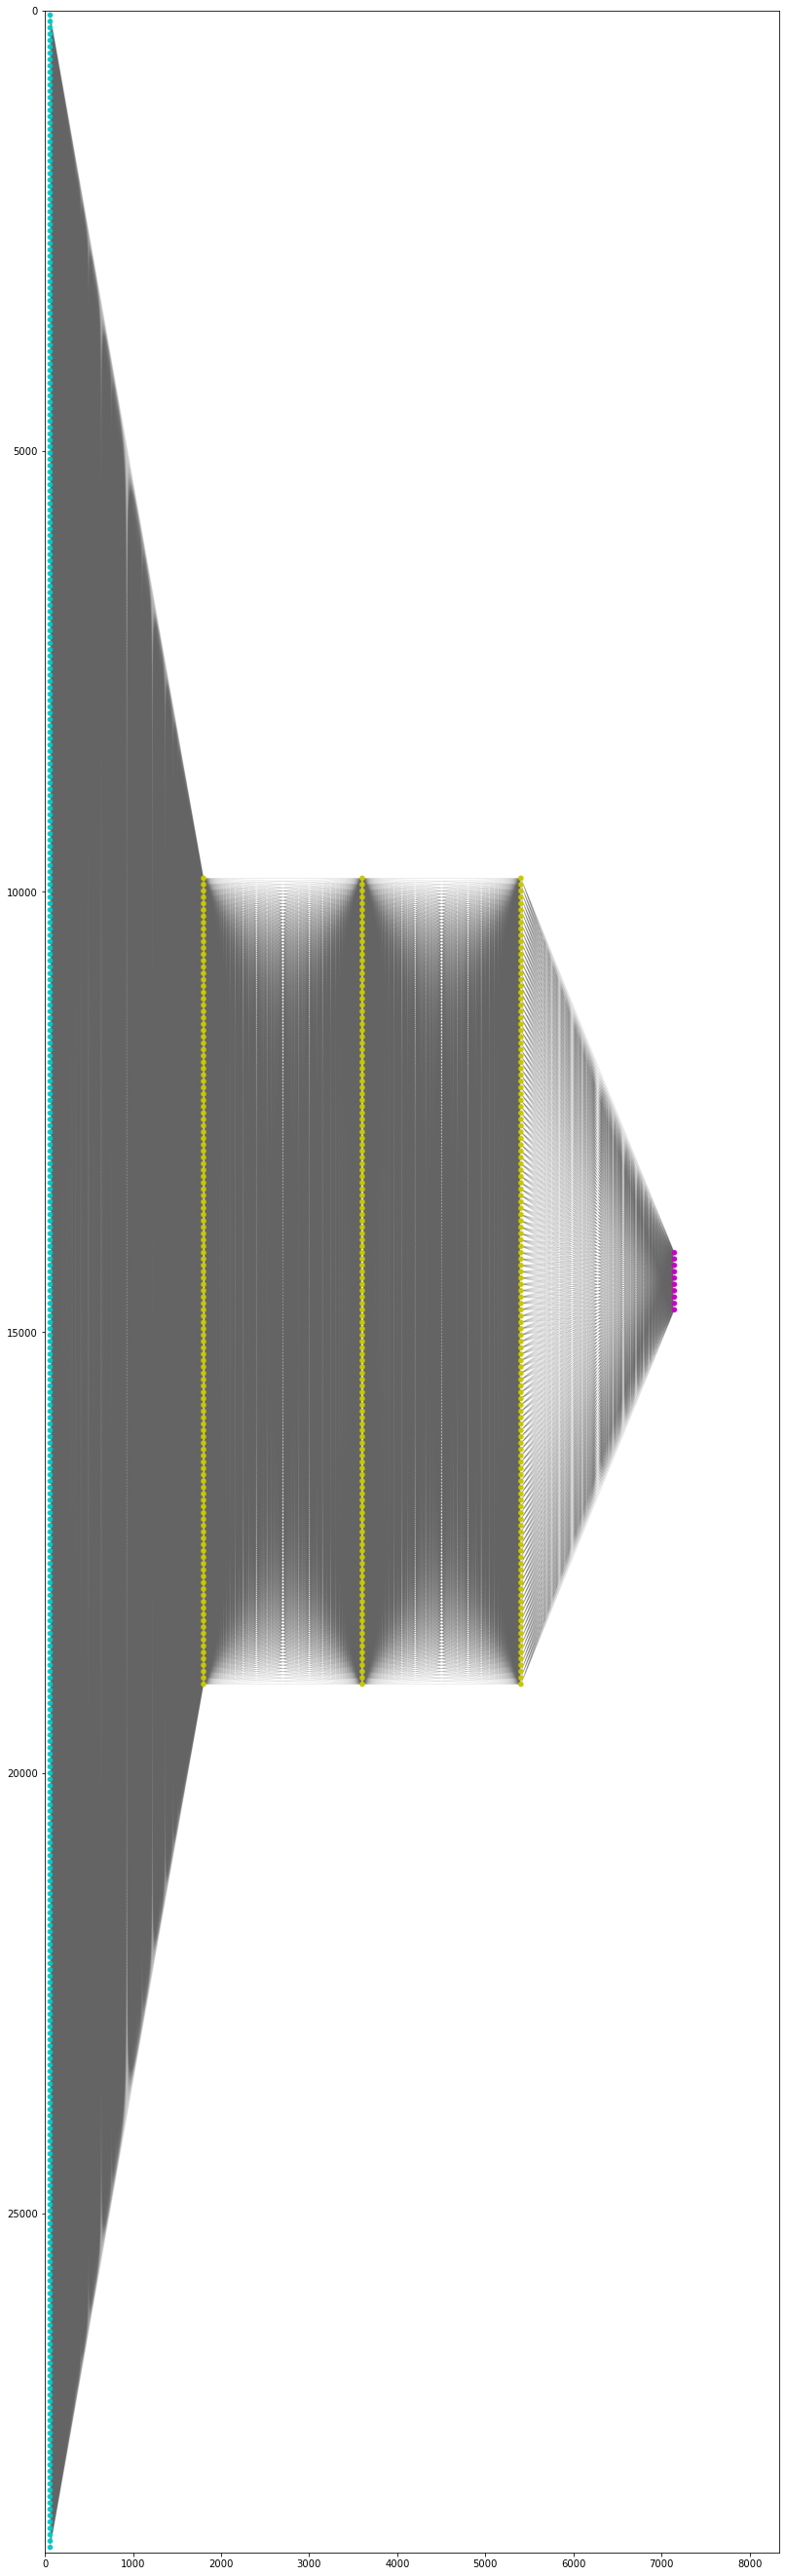

True

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from cv2 import cv2

circle_radius = 30 #인풋, 퍼셉트론, 아웃풋 서클의 사이즈. 픽셀 단위.
line_color = (100, 100, 100)
circle_padding = int(circle_radius*2*0.2)

input_count = 400
input_color = (0, 200, 200)

layer_count = 3
layer_padding = int(circle_radius*2*8)

perceptron_count = 128
perceptron_color = (200, 200, 0)

output_count = 10
output_color = (200, 0, 200)

ref_count = max(input_count, perceptron_count, output_count)

img_width = (circle_radius * 2 * (layer_count+1)) + (layer_padding * layer_count) + int(layer_padding/2)
img_height = (circle_radius * 2 * ref_count) + (circle_padding * (ref_count-1)) + (circle_radius*2)
fig_width = 14 #인치
fig_height = int((img_height*fig_width)/img_width)
plt.rcParams["figure.figsize"] = (fig_width, fig_height)
# plt.axis("off")

canvas = np.full((img_height, img_width, 3), (255, 255, 255), dtype=np.uint8)

#인풋 그리기
input_start_x = circle_radius*2
input_start_y = int((img_height - (circle_radius*2*input_count) - (circle_padding*(input_count-1)))/2) + circle_radius
perceptron_start_y = int((img_height - (circle_radius*2*perceptron_count) - (circle_padding*(perceptron_count-1)))/2) + circle_radius
for input_cnt in range(input_count): #라인을 먼저 그리고
    y = input_start_y + (circle_radius*2*input_cnt) + (circle_padding*input_cnt)
    for perceptron_arrow_count in range(perceptron_count):
        y_next_layer = perceptron_start_y + (circle_radius*2*perceptron_arrow_count) + (circle_padding*perceptron_arrow_count)
        cv2.line(canvas, (input_start_x, y), (layer_padding, y_next_layer), line_color, 1, cv2.LINE_AA)
for input_cnt in range(input_count): #인풋을 그림
    y = input_start_y + (circle_radius*2*input_cnt) + (circle_padding*input_cnt)
    cv2.circle(canvas, (input_start_x, y), circle_radius, input_color, -1, cv2.LINE_AA)

#퍼셉트론 그리기
output_start_y = int((img_height - (circle_radius*2*output_count) - (circle_padding*(output_count-1)))/2) + circle_radius
for layer_cnt in range(layer_count):
    x = layer_padding * (layer_cnt + 1)
    x_next_layer = layer_padding * (layer_cnt + 2)
    x_last_layer = x_next_layer - (circle_radius*2)
    for percentron_cnt in range(perceptron_count): #라인을 먼저 그리고
        y = perceptron_start_y + (circle_radius*2*percentron_cnt) + (circle_padding*percentron_cnt)
        if layer_cnt < (layer_count-1):
            for perceptron_arrow_count in range(perceptron_count):
                y_next_layer = perceptron_start_y + (circle_radius*2*perceptron_arrow_count) + (circle_padding*perceptron_arrow_count)
                cv2.line(canvas, (x, y), (x_next_layer, y_next_layer), line_color, 1, cv2.LINE_AA)
        else:
            for output_arrow_count in range(output_count):
                y_next_layer = output_start_y + (circle_radius*2*output_arrow_count) + (circle_padding*output_arrow_count)
                cv2.line(canvas, (x, y), (x_last_layer, y_next_layer), line_color, 1, cv2.LINE_AA)
    for percentron_cnt in range(perceptron_count):
        y = perceptron_start_y + (circle_radius*2*percentron_cnt) + (circle_padding*percentron_cnt)
        cv2.circle(canvas, (x, y), circle_radius, perceptron_color, -1, cv2.LINE_AA)

#아웃풋 그리기
output_start_x = x_last_layer
for output_cnt in range(output_count):
    y = output_start_y + (circle_radius*2*output_cnt) + (circle_padding*output_cnt)
    cv2.circle(canvas, (output_start_x, y), circle_radius, output_color, -1, cv2.LINE_AA)
        
        
plt.imshow(canvas)
plt.show()
cv2.imwrite("perceptron.png", canvas)